# Clasificadores lineales

In [1]:
from clasificadores_lineales import *
import numpy as np

## Curvas de aprendizaje (I.3)

/home/roberto/Documentos/us/practicas/aia/trabajo/clasificadores_lineales.py:347: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-wx))


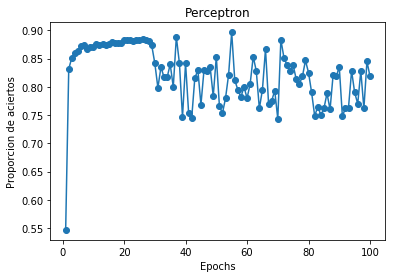

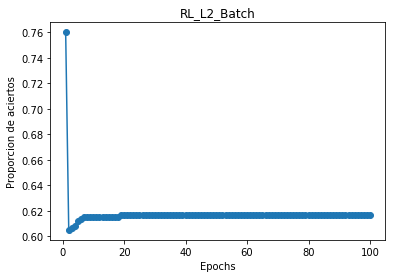

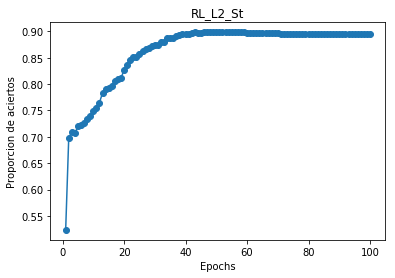

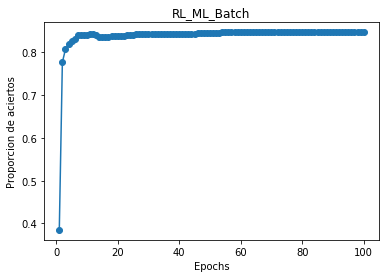

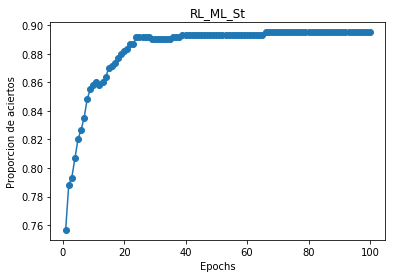

In [2]:
entrenar_y_dibujar_binarios(n_epochs=100, rate=0.001, rate_decay=True,
                            normalizacion=False,n_datos=600, dim_datos=4,
                            rango=3, separables=False)

## Aplicando clasificadores (III.2)
Aplicamos nuestros clasificadores a diferentes datasets

### Iris
Aplicamos One Hot Encoding a las clases

In [3]:
from iris import *

def one_hot_encoding_iris(clases, clas_list):
    for i, clase in enumerate(clas_list):
        if clase == clases[0]:
            clas_list[i] = 0
        elif clase == clases[1]:
            clas_list[i] = 1
        else:
            iris_entr_clas[i] = 2

one_hot_encoding_iris(iris_clases, iris_entr_clas)
iris_entr = np.array(iris_entr)
iris_entr_clas = np.array(iris_entr_clas)

#### Clasificador OvR

In [4]:
ovr_iris = Clasificador_RL_OvR(Clasificador_RL_ML_St, [0, 1, 2])
ovr_iris.entrena(iris_entr, iris_entr_clas, 1000, rate_decay=True, rate=0.01)
rendimiento(ovr_iris, iris_entr, iris_entr_clas)

0.8866666666666667

#### Clasificador Softmax

In [5]:
softmax_iris = Clasificador_RL_Softmax([0, 1, 2])
softmax_iris.entrena(iris_entr, iris_entr_clas, 100, rate_decay=True, rate=0.01)
rendimiento(softmax_iris, iris_entr, iris_entr_clas)

0.6666666666666666

### Votos
Aplicamos One Hot Encoding a las clases

In [6]:
from votos import *

def one_hot_encoding_votos(clases, clas_list):
    for i, partido in enumerate(clas_list):
        if partido == clases[0]:
            clas_list[i] = 0
        else:
            clas_list[i] = 1

one_hot_encoding_votos(votos_clases, votos_entr_clas)
one_hot_encoding_votos(votos_clases, votos_valid_clas)
one_hot_encoding_votos(votos_clases, votos_test_clas)

votos_entr = np.array(votos_entr)
votos_entr_clas = np.array(votos_entr_clas)
votos_valid = np.array(votos_valid)
votos_valid_clas = np.array(votos_valid_clas)
votos_test = np.array(votos_test)
votos_test_clas = np.array(votos_test_clas)

In [7]:
#La funcion nos da el mejor clasificador con respecto a los conjuntos de validación
entrenar_y_rendimiento_multis(200, 0.001, True, [0,1], votos_entr,
                              votos_entr_clas, votos_valid,
                              votos_valid_clas)

/home/roberto/Documentos/us/practicas/aia/trabajo/clasificadores_lineales.py:347: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-wx))


{'ovr_perceptron': 0.927536231884058, 'ovr_rl_l2_batch': 0.927536231884058, 'ovr_rl_l2_st': 0.9710144927536232, 'ovr_rl_ml_batch': 0.9710144927536232, 'ovr_rl_ml_st': 0.9710144927536232, 'rl_softmax': 0.927536231884058}


('ovr_rl_l2_st', 0.9710144927536232)

### MNIST (Dígitos)

In [8]:
def imagenes_a_array(ruta):
    n_lineas = 0
    with open(ruta, 'r') as f:
        for linea in f:
            n_lineas += 1
    n_imagenes = n_lineas // 28 + 1
    array = np.zeros((n_imagenes, 28, 28))
    with open(ruta, 'r') as archivo:
        lineas = archivo.read().splitlines()
        for n_imagen in range(n_imagenes):
            for i in range(28):
                for j in range(28):
                    if lineas[n_imagen+i][j] == "+" or  lineas[n_imagen+i][j] == "#":
                        array[n_imagen, i, j] = 1
        return array.reshape(n_imagenes, 784)

def labels_a_array(ruta):
    etiquetas = []
    with open(ruta, 'r') as archivo:
        for linea in archivo:
            etiquetas.append(int(linea))
    return np.array(etiquetas)

ruta_a_digidata = '/home/roberto/Documentos/us/practicas/aia/trabajo/digitdata/'

digidata_train = imagenes_a_array(ruta_a_digidata + 'trainingimages')
digidata_val = imagenes_a_array(ruta_a_digidata + 'validationimages')
digidata_test = imagenes_a_array(ruta_a_digidata + 'testimages')
digidata_train_clas = labels_a_array(ruta_a_digidata + 'traininglabels')
digidata_val_clas = labels_a_array(ruta_a_digidata + 'validationlabels')
digidata_test_clas = labels_a_array(ruta_a_digidata + 'testlabels')

Al intentar leerlo me he dado cuenta de que los datos no están en formato 28*28 de modo que no tengo demasiado claro como tratarlo a la hora de tratar los datos.
Pero si fuese correcto podría hacerse algo así

In [9]:
#ovr_digidata = Clasificador_RL_OvR(Clasificador_RL_ML_St, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#ovr_digidata.entrena(digidata_train, digidata_train_clas, 1000, 0.05, True)
#rendimiento(ovr_digidata, digidata_val, digidata_val_clas)

### [Car Evaluation](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)

In [25]:
def one_hot_encoding_car(clases, clas_list):
    n_clases = len(clases)
    for i, elemento in enumerate(clas_list):
        for j in range(n_clases):
            if elemento == clases[j]:
                clas_list[i] = j

buying = []
maint = []
doors = []
persons = []
lug_boot = []
safety = []
acceptability = []
with open('/home/roberto/Documentos/us/practicas/aia/trabajo/car.data', 'r') as car_file:
    for linea in car_file:
        linea = linea.split(',')
        buying.append(linea[0])
        maint.append(linea[1])
        doors.append(linea[2])
        persons.append(linea[3])
        lug_boot.append(linea[4])
        safety.append(linea[5])
        acceptability.append(linea[6].strip())

car_clases = ['unacc', 'acc', 'good', 'vgood']
one_hot_encoding_car(['vhigh', 'high', 'med', 'low'], buying)
one_hot_encoding_car(['vhigh', 'high', 'med', 'low'], maint)
one_hot_encoding_car(['2', '3', '4', '5more'], doors)
one_hot_encoding_car(['2', '4', 'more'], persons)
one_hot_encoding_car(['small', 'med', 'big'], lug_boot)
one_hot_encoding_car(['low', 'med', 'high'], safety)
one_hot_encoding_car(car_clases, acceptability)

data = np.column_stack((buying, maint, doors, persons, lug_boot, safety, acceptability))
np.random.shuffle(data)
len(data)
entr_data, valid_data, test_data = data[:1500], data[1501:1628], data[1629:]
entr_car, valid_car, test_car = entr_data[:, :5], valid_data[:, :5], test_data[:, :5]
clas_entr_car, clas_valid_car, clas_test_car = entr_data[:, 6], valid_data[:, 6], test_data[:, 6]

array([0, 2, 0, ..., 0, 0, 1])